In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


In [43]:
# Veriyi yükleme
data = pd.read_csv("C:\\Users\\Beyza\\Downloads\\Parkison_Dataset.csv")

In [44]:
print(data.info())#Veri setine ait bilgiler

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB
None


In [45]:
print(data.isnull().sum()) # Eksik değer kontrolü

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64


In [46]:
print(data.head())#İlk 5 satırı yazdırma

   id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0   0       1  0.85247  0.71826  0.57227        240               239   
1   0       1  0.76686  0.69481  0.53966        234               233   
2   0       1  0.85083  0.67604  0.58982        232               231   
3   1       0  0.41121  0.79672  0.59257        178               177   
4   1       0  0.32790  0.79782  0.53028        236               235   

   meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...  \
0          0.008064            0.000087       0.00218  ...   
1          0.008258            0.000073       0.00195  ...   
2          0.008340            0.000060       0.00176  ...   
3          0.010858            0.000183       0.00419  ...   
4          0.008162            0.002669       0.00535  ...   

   tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29  \
0                     1.5620                     2.6445   
1                     1.5589                     3.6107   
2          

In [47]:
# Veriyi X (özellikler) ve y (hedef) olarak ayırma
X = data.drop('class', axis=1)  # 'class' sütunu hedef değişken olarak kabul ediliyor
y = data['class']

In [73]:
# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [74]:
X_train

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
182,60,0,0.47012,0.68923,0.56710,335,334,0.005758,0.001560,0.00351,...,8.2985,12.0478,7.6149,2.6906,2.4633,2.7684,18.1463,21.1227,25.0390,10.1173
575,191,1,0.81741,0.63870,0.54005,249,248,0.007776,0.000053,0.00121,...,1.5844,1.5883,3.0578,2.6221,2.9641,3.1141,2.9502,4.4095,3.3050,11.6049
399,133,0,0.84591,0.60866,0.59179,472,471,0.004091,0.000234,0.00263,...,76.6302,35.0462,62.7041,50.5068,28.7728,23.4105,30.2428,44.5080,41.9666,79.8961
583,194,0,0.86410,0.72404,0.21847,520,519,0.003713,0.000022,0.00048,...,69.8380,28.8705,27.0722,16.8942,6.9145,7.9410,9.1942,6.2766,5.1194,6.1003
223,74,1,0.47019,0.75495,0.63768,227,226,0.008497,0.002735,0.00835,...,184.0917,115.2017,76.3111,10.3347,3.3531,3.5236,16.8188,30.3167,27.3304,14.9176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,23,1,0.31431,0.77186,0.62721,231,230,0.008341,0.000250,0.00327,...,3.4251,4.7490,7.6582,12.3930,3.1410,2.9371,4.4207,6.4558,4.9663,5.0628
106,35,0,0.82435,0.67512,0.37135,415,414,0.004644,0.000030,0.00076,...,6.3202,5.2622,3.3257,2.6209,2.5962,2.9097,3.4120,2.6230,2.7187,3.0654
270,90,0,0.50598,0.64620,0.69831,168,167,0.011474,0.000296,0.00729,...,2.1926,6.1377,6.1270,4.7823,4.8881,2.5868,2.9627,3.8031,3.7451,2.9601
435,145,1,0.82759,0.63558,0.37521,344,343,0.005612,0.000053,0.00121,...,57.3059,160.6611,130.0455,100.7989,56.3096,32.9181,39.1589,46.2313,38.2874,42.7546


In [75]:
y_test

408    0
97     1
424    1
584    0
603    1
      ..
595    0
239    1
250    0
538    1
494    1
Name: class, Length: 227, dtype: int64

In [76]:
# Özellikleri ölçeklendirme

scaler = StandardScaler()  # StandardScaler nesnesi oluşturma
X_train_scaled = scaler.fit_transform(X_train)  # Eğitim verisini ölçeklendirme
X_test_scaled = scaler.transform(X_test)  # Test verisini ölçeklendirme (fit_transform değil, sadece transform)

#    KNN modeli oluşturma ve  eğitme


In [77]:
# KNN modeli oluşturma ve eğitme
knn_model = KNeighborsClassifier(n_neighbors=5)  # KNN modeli oluşturma (k=5)
knn_model.fit(X_train_scaled, y_train)  # Modeli eğitim verisiyle eğitme


KNeighborsClassifier()

In [78]:
 # Model ile test verisini tahmin etme
y_pred_knn = knn_model.predict(X_test_scaled)

In [79]:
# Modelin doğruluğunu hesaplama
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Model Accuracy: {accuracy_knn}")


KNN Model Accuracy: 0.8722466960352423


In [80]:
cm_knn = confusion_matrix(y_test, y_pred_knn)  # Confusion matrix hesaplama
class_report_knn = classification_report(y_test, y_pred_knn)  # Sınıflandırma raporu oluşturma

In [81]:
print("KNN Model Confusion Matrix:")
print(cm_knn)
print("\nKNN Model Classification Report:")
print(class_report_knn)

KNN Model Confusion Matrix:
[[ 33  28]
 [  1 165]]

KNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.54      0.69        61
           1       0.85      0.99      0.92       166

    accuracy                           0.87       227
   macro avg       0.91      0.77      0.81       227
weighted avg       0.89      0.87      0.86       227



#    Logistic Regression Modeli:

In [111]:
log_model = LogisticRegression(max_iter=1000)  # Lojistik regresyon modeli oluşturma (maksimum iterasyon 1000)
log_model.fit(X_train_scaled, y_train)  # Modeli eğitim verisiyle eğitme

LogisticRegression(max_iter=1000)

In [112]:
y_pred_log = log_model.predict(X_test_scaled)  # Model ile test verisini tahmin etme

In [113]:
accuracy_log = accuracy_score(y_test, y_pred_log)  # Modelin doğruluğunu hesaplama
print(f"Logistic Regression Accuracy: {accuracy_log}")

Logistic Regression Accuracy: 0.8370044052863436


In [114]:
cm_log = confusion_matrix(y_test, y_pred_log)  # Confusion matrix hesaplama
class_report_log = classification_report(y_test, y_pred_log)  # Sınıflandırma raporu oluşturma

In [115]:
print("Logistic Regression Model Confusion Matrix:")
print(cm_log)
print("\nLogistic Regression Model Classification Report:")
print(class_report_log)

Logistic Regression Model Confusion Matrix:
[[ 36  25]
 [ 12 154]]

Logistic Regression Model Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.59      0.66        61
           1       0.86      0.93      0.89       166

    accuracy                           0.84       227
   macro avg       0.81      0.76      0.78       227
weighted avg       0.83      0.84      0.83       227



#    Destek Vektör Makineleri (SVM) Modeli:

In [116]:
#modeli oluşturma ve eğitme
svm_model = SVC()  # SVM modeli oluşturma
svm_model.fit(X_train_scaled, y_train)  # Modeli eğitim verisiyle eğitme

SVC()

In [117]:
 # Model ile test verisini tahmin etme
y_pred_svm = svm_model.predict(X_test_scaled)

In [118]:
#doğruluk hesaplama
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model Accuracy: {accuracy_svm}")

SVM Model Accuracy: 0.8370044052863436


In [119]:
  # Confusion matrix hesaplama
cm_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

In [120]:
print("SVM  Confusion Matrix:")
print(cm_svm)
print("\nSVM  Classification Report:")
print(class_report_svm)

SVM  Confusion Matrix:
[[ 25  36]
 [  1 165]]

SVM  Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.41      0.57        61
           1       0.82      0.99      0.90       166

    accuracy                           0.84       227
   macro avg       0.89      0.70      0.74       227
weighted avg       0.86      0.84      0.81       227



#    Decision Tree

In [121]:
dt_ = DecisionTreeClassifier()  # Karar ağacı modeli oluşturma
dt_.fit(X_train_scaled, y_train)  # Modeli eğitim verisiyle eğitme

DecisionTreeClassifier()

In [122]:
y_pred_dt = dt_.predict(X_test_scaled)  # Model ile test verisini tahmin etme

In [123]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)  # Modelin doğruluğunu hesaplama
print(f"Decision Tree Model Accuracy: {accuracy_dt}")


Decision Tree Model Accuracy: 0.775330396475771


In [124]:
cm_dt = confusion_matrix(y_test, y_pred_dt)  # Confusion matrix hesaplama
class_report_dt = classification_report(y_test, y_pred_dt)  # Sınıflandırma raporu oluşturma

In [125]:
print("Decision Tree Model Confusion Matrix (cm_dt):")
print(cm_dt)
print("\nDecision Tree Model Classification Report:")
print(class_report_dt)

Decision Tree Model Confusion Matrix (cm_dt):
[[ 35  26]
 [ 25 141]]

Decision Tree Model Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.57      0.58        61
           1       0.84      0.85      0.85       166

    accuracy                           0.78       227
   macro avg       0.71      0.71      0.71       227
weighted avg       0.77      0.78      0.77       227



#    Yapay Sinir Ağı (Neural Network) Modeli

In [97]:
nn_model = MLPClassifier(max_iter=1000)  # Yapay sinir ağı modeli oluşturma (maksimum iterasyon 1000)
nn_model.fit(X_train_scaled, y_train)  # Modeli eğitim verisiyle eğitme

MLPClassifier(max_iter=1000)

In [98]:
y_pred_nn = nn_model.predict(X_test_scaled)  # Model ile test verisini tahmin etme

In [99]:
accuracy_nn = accuracy_score(y_test, y_pred_nn)  # Modelin doğruluğunu hesaplama

print(f"Neural Network Model Accuracy: {accuracy_nn}")

Neural Network Model Accuracy: 0.8590308370044053


In [100]:
cm_nn = confusion_matrix(y_test, y_pred_nn)  # Confusion matrix hesaplama
class_report_nn = classification_report(y_test, y_pred_nn)  # Sınıflandırma raporu oluşturma

In [101]:
print("Neural Network Confusion Matrix:")
print(cm_nn)
print("\nNeural Network Classification Report:")
print(class_report_nn)

Neural Network Confusion Matrix:
[[ 37  24]
 [  8 158]]

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.61      0.70        61
           1       0.87      0.95      0.91       166

    accuracy                           0.86       227
   macro avg       0.85      0.78      0.80       227
weighted avg       0.86      0.86      0.85       227



#     Naive Bayes Modeli

In [102]:
nb_model = GaussianNB()  # Naive Bayes modeli oluşturma
nb_model.fit(X_train_scaled, y_train)  # Modeli eğitim verisiyle eğitme

GaussianNB()

In [103]:
y_pred_nb = nb_model.predict(X_test_scaled)  # Model ile test verisini tahmin etme

In [104]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)  # Modelin doğruluğunu hesaplama
print(f"Naive Bayes Model Accuracy: {accuracy_nb}")


Naive Bayes Model Accuracy: 0.7665198237885462


In [105]:
cm_nb = confusion_matrix(y_test, y_pred_nb)  # Confusion matrix hesaplama
class_report_nb = classification_report(y_test, y_pred_nb)  # Sınıflandırma raporu oluşturma

In [106]:
print("Naive Bayes Model Confusion Matrix:")
print(cm_nb)
print("\nNaive Bayes Model Classification Report:")
print(class_report_nb)

Naive Bayes Model Confusion Matrix:
[[ 40  21]
 [ 32 134]]

Naive Bayes Model Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.66      0.60        61
           1       0.86      0.81      0.83       166

    accuracy                           0.77       227
   macro avg       0.71      0.73      0.72       227
weighted avg       0.78      0.77      0.77       227



# Modellerin Doğruluk Değerlerinin Karşılaştırılması
Her modelin doğruluk değerlerini karşılaştırarak bir grafik oluşturuyoruz:

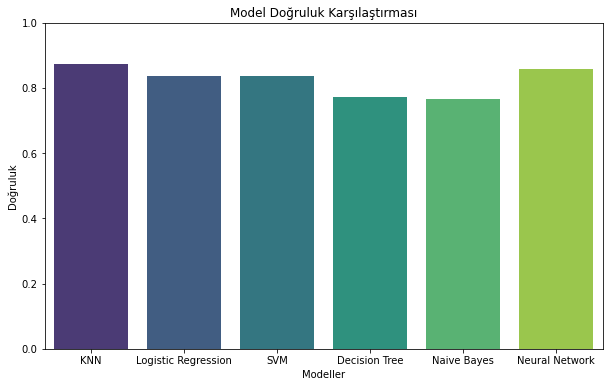

In [107]:
# Doğruluk değerlerini grafikleme
accuracies = {
    'KNN': accuracy_knn,
    'Logistic Regression': accuracy_log,
    'SVM': accuracy_svm,
    'Decision Tree': accuracy_dt,
    'Naive Bayes': accuracy_nb,
    'Neural Network': accuracy_nn
}

models = list(accuracies.keys())  # Modellerin isimlerini liste olarak alıyoruz
accuracy_values = list(accuracies.values())  # Doğruluk değerlerini liste olarak alıyoruz

plt.figure(figsize=(10, 6))  # Grafik boyutlarını belirleme
sns.barplot(x=models, y=accuracy_values, palette='viridis')  # Çubuk grafik oluşturma
plt.title('Model Doğruluk Karşılaştırması')  # Grafik başlığı
plt.xlabel('Modeller')  # X ekseni etiketi
plt.ylabel('Doğruluk')  # Y ekseni etiketi
plt.ylim(0, 1)  # Y ekseni aralığı
plt.show()  # Grafiği gösterme

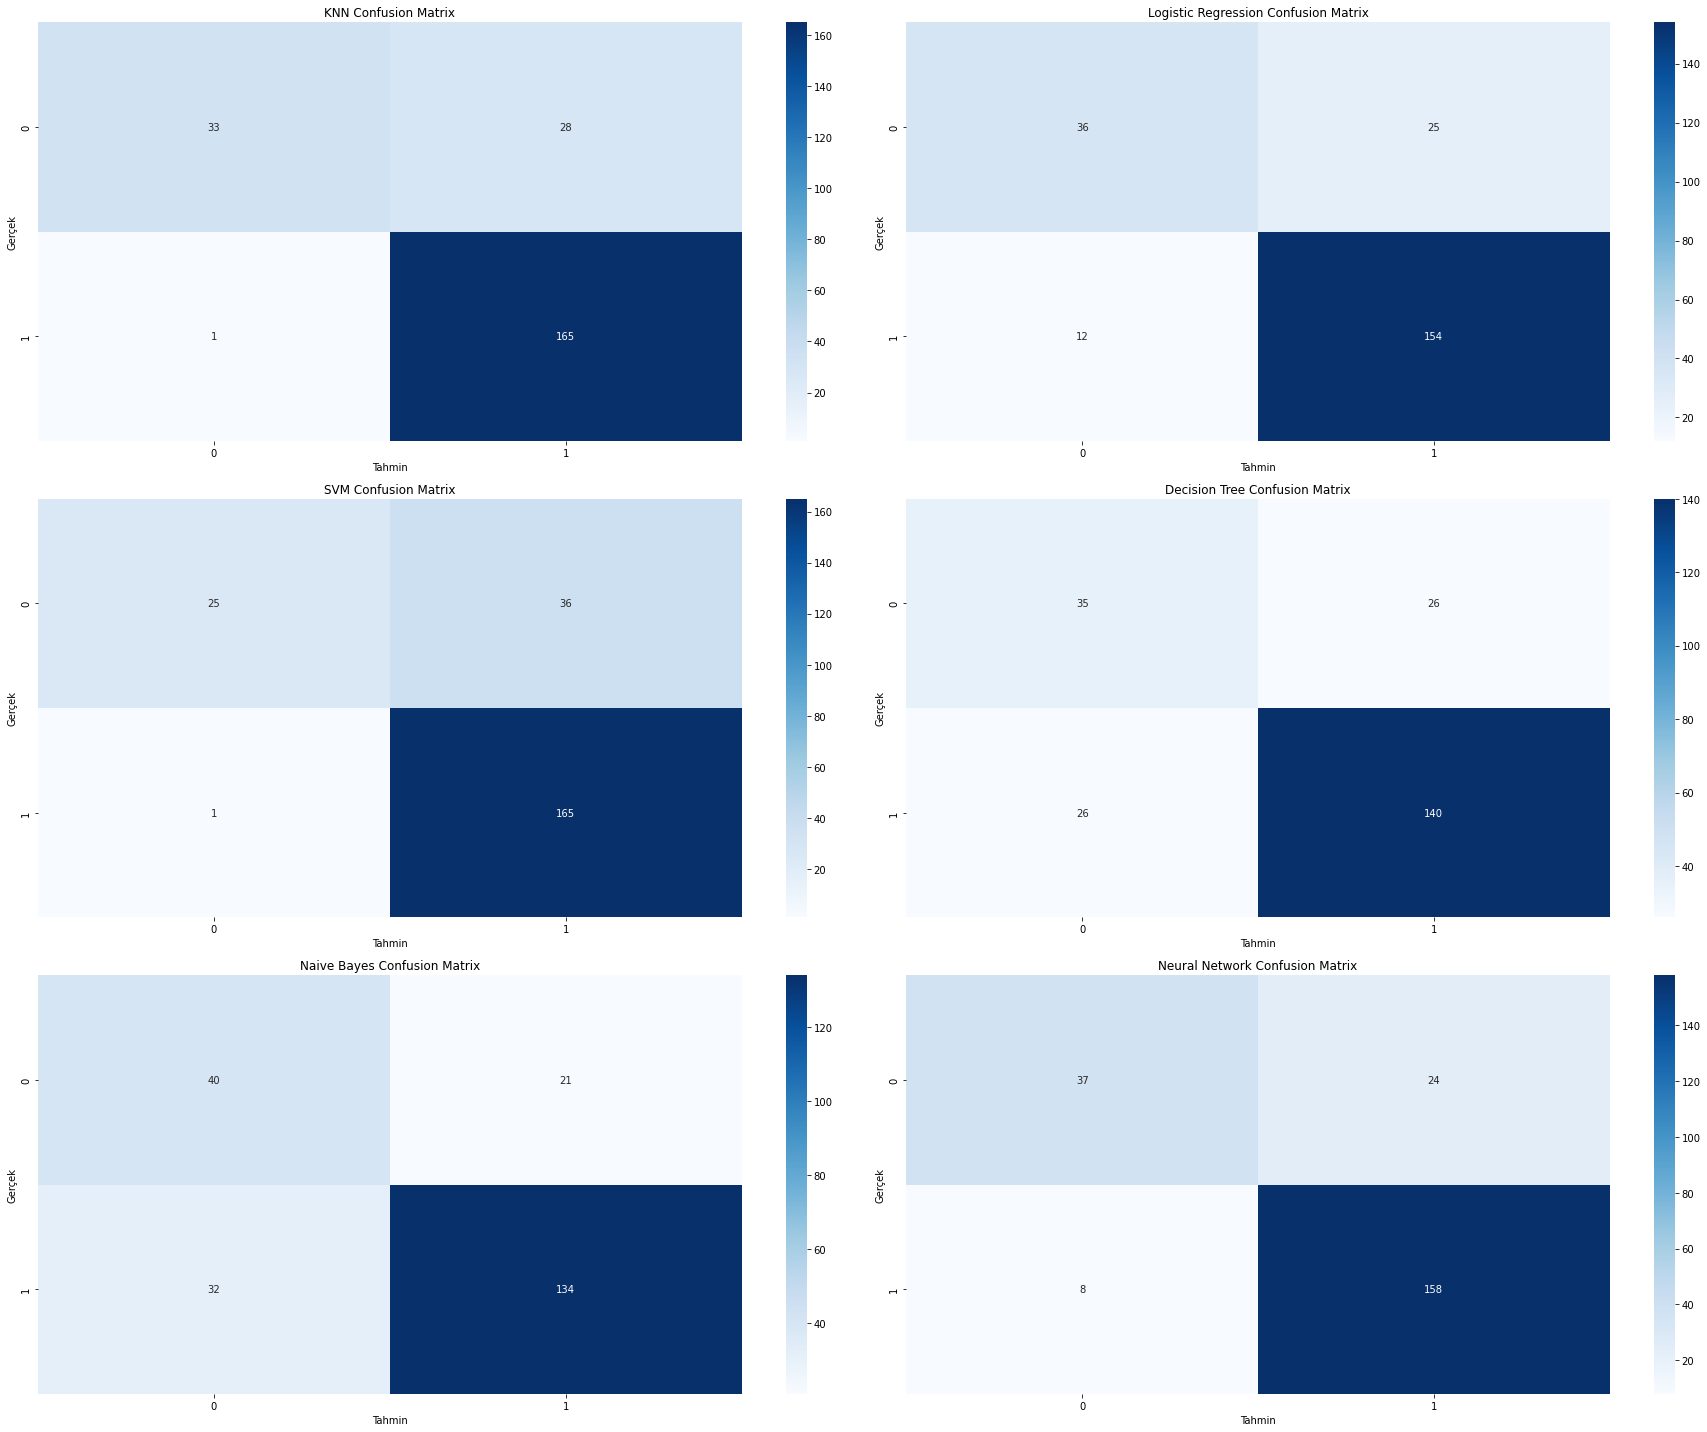

In [108]:
# Confusion matrixleri grafikleme

fig, axes = plt.subplots(3, 2, figsize=(25, 20))  # Alt grafikler için 3x2'lik bir figür oluşturma

# KNN Confusion Matrix

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('KNN Confusion Matrix')
axes[0, 0].set_xlabel('Tahmin')
axes[0, 0].set_ylabel('Gerçek')

# Logistic Regression Confusion Matrix

sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Logistic Regression Confusion Matrix')
axes[0, 1].set_xlabel('Tahmin')
axes[0, 1].set_ylabel('Gerçek')

# SVM Confusion Matrix

sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('SVM Confusion Matrix')
axes[1, 0].set_xlabel('Tahmin')
axes[1, 0].set_ylabel('Gerçek')

# Decision Tree Confusion Matrix

sns.heatmap(cm_dt, annot=True, cmap='Blues', ax=axes[1, 1], fmt='d')
axes[1, 1].set_title('Decision Tree Confusion Matrix')
axes[1, 1].set_xlabel('Tahmin')
axes[1, 1].set_ylabel('Gerçek')

# Naive Bayes Confusion Matrix

sns.heatmap(cm_nb, annot=True, cmap='Blues', ax=axes[2, 0], fmt='d')
axes[2, 0].set_title('Naive Bayes Confusion Matrix')
axes[2, 0].set_xlabel('Tahmin')
axes[2, 0].set_ylabel('Gerçek')

# Neural Network Confusion Matrix

sns.heatmap(cm_nn, annot=True, cmap='Blues', ax=axes[2, 1], fmt='d')
axes[2, 1].set_title('Neural Network Confusion Matrix')
axes[2, 1].set_xlabel('Tahmin')
axes[2, 1].set_ylabel('Gerçek')

plt.tight_layout()  # Alt grafikler arasında düzgün boşluk bırakma
plt.show()  # Grafikleri gösterme

    CROSS VALİDATİON
-modelin çeşitli veri alt kümeleri üzerinde test edilmesi
-model performansını ve genellenebilirliğini değerlendiririz

mean accuracy : doğruluk oratalaması , modelin genel performansını yansıtır


standard deviation : standart sapma, modelin farklı bölümlerdeki performans değişikliğini ölçer 

-- küçük  -> tutarlı , 
-- büyük -> performans veri alt kümelerine bağlı değişir

In [109]:
from sklearn.model_selection import KFold, cross_val_score

In [110]:

# Cross-validation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_scores = cross_val_score(knn_model, X_scaled, y, cv=kf, scoring='accuracy')
print(f"KNN Model Accuracy (Cross-Validation): Mean = {np.mean(knn_scores)}, Std = {np.std(knn_scores)}")

logreg_model = LogisticRegression(max_iter=1000)
logreg_scores = cross_val_score(logreg_model, X_scaled, y, cv=kf, scoring='accuracy')
print(f"Logistic Regression Accuracy (Cross-Validation): Mean = {np.mean(logreg_scores)}, Std = {np.std(logreg_scores)}")

svm_model = SVC()
svm_scores = cross_val_score(svm_model, X_scaled, y, cv=kf, scoring='accuracy')
print(f"SVM Accuracy (Cross-Validation): Mean = {np.mean(svm_scores)}, Std = {np.std(svm_scores)}")

decision_tree_model = DecisionTreeClassifier()
decision_tree_scores = cross_val_score(decision_tree_model, X_scaled, y, cv=kf, scoring='accuracy')
print(f"Decision Tree Accuracy (Cross-Validation): Mean = {np.mean(decision_tree_scores)}, Std = {np.std(decision_tree_scores)}")

nb_model = GaussianNB()
nb_scores = cross_val_score(nb_model, X_scaled, y, cv=kf, scoring='accuracy')
print(f"Naive Bayes Accuracy (Cross-Validation): Mean = {np.mean(nb_scores)}, Std = {np.std(nb_scores)}")

nn_model = MLPClassifier(max_iter=1000)
nn_scores = cross_val_score(nn_model, X_scaled, y, cv=kf, scoring='accuracy')
print(f"Neural Network Accuracy (Cross-Validation): Mean = {np.mean(nn_scores)}, Std = {np.std(nn_scores)}")

KNN Model Accuracy (Cross-Validation): Mean = 0.8504792610665737, Std = 0.02486093747316647
Logistic Regression Accuracy (Cross-Validation): Mean = 0.8359358661554548, Std = 0.03700049349216373
SVM Accuracy (Cross-Validation): Mean = 0.8558121296619031, Std = 0.019429231738802788
Decision Tree Accuracy (Cross-Validation): Mean = 0.8015772046009062, Std = 0.04086803199535762
Naive Bayes Accuracy (Cross-Validation): Mean = 0.7962879051934472, Std = 0.025674011901954112
Neural Network Accuracy (Cross-Validation): Mean = 0.879644475426978, Std = 0.015766643467330674


Stacking Model Accuracy: 0.9078947368421053
Stacking Model Confusion Matrix:
[[ 28  10]
 [  4 110]]

Stacking Model Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.74      0.80        38
           1       0.92      0.96      0.94       114

    accuracy                           0.91       152
   macro avg       0.90      0.85      0.87       152
weighted avg       0.91      0.91      0.91       152



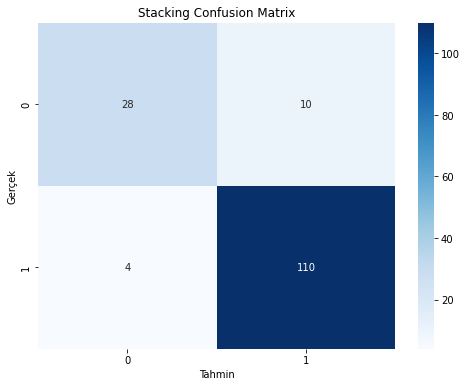

In [37]:
from sklearn.ensemble import StackingClassifier

base_models = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('logreg', LogisticRegression(max_iter=1000)),
    ('dt', DecisionTreeClassifier())
]
meta_model = LogisticRegression(max_iter=1000)

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

stacking_model.fit(X_train_scaled, y_train)

y_pred_stack = stacking_model.predict(X_test_scaled)

accuracy_stack = accuracy_score(y_test, y_pred_stack)
print(f"Stacking Model Accuracy: {accuracy_stack}")

cm_stack = confusion_matrix(y_test, y_pred_stack)
class_report_stack = classification_report(y_test, y_pred_stack)

print("Stacking Model Confusion Matrix:")
print(cm_stack)
print("\nStacking Model Classification Report:")
print(class_report_stack)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_stack, annot=True, fmt='d', cmap='Blues')
plt.title('Stacking Confusion Matrix')
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.show()


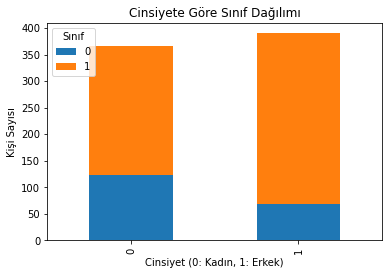

In [38]:
p = data.groupby(['gender', 'class']).size().unstack()
p.plot(kind='bar', stacked=True)
plt.title('Cinsiyete Göre Sınıf Dağılımı')
plt.xlabel('Cinsiyet (0: Kadın, 1: Erkek)')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Sınıf', loc='upper left')
plt.show()